<a href="https://colab.research.google.com/github/Sunil-tagore/Hotel-Booking-/blob/main/Hotel_Booking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('hotel_bookings.csv')

In [ ]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,9/7/2017
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,9/7/2017


In [ ]:
df.shape

(119390, 32)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
def data_clean(df):
    df.fillna(0,inplace=True)
    print(df.isnull().sum())

In [ ]:
data_clean(df)

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
lst=['adults', 'children', 'babies']  # People who are involved in the hotel booking from the dataset (As they are our top priority)
for i in lst:
    print('{} has unique values {}'.format(i,df[i].unique()))


adults has unique values [ 2  1  3  4 40 26 50 27 55  0 20  6  5 10]
children has unique values [ 0.  1.  2. 10.  3.]
babies has unique values [ 0  1  2 10  9]


In [ ]:
#filtering the data 
# As at a time adult,babies and children cant have "0" so we are filtering them 
filter=(df['children']==0) & (df['adults']==0) & (df['babies']==0)   # we used "&" instead of "and" because we are not operating between truth values rather b/w pandas dataframe columns
df[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [ ]:
# To expand the hidden columns use the below command and then again run filter command for the above code we already written
pd.set_option('display.max_columns',32)

In [ ]:
filter=(df['children']==0) & (df['adults']==0) & (df['babies']==0)

df[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,1,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,0,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,0.0,0,SC,ESP,Groups,TA/TO,0,0,0,A,C,0,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,C,1,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,0.0,0,BB,CHE,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,0.0,0,SC,PRT,Complementary,Direct,0,0,0,E,K,0,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,0.0,0,SC,SWE,Online TA,TA/TO,0,0,0,A,K,2,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,0.0,0,SC,RUS,Online TA,TA/TO,0,0,0,A,K,1,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [ ]:
data=df[~filter]
data.head()
# so the remaining Clean data after filtering is this "data" 

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [ ]:
data.shape  #After filtering the dataset the remaining rows and columns on which we need to perform our operations are 

(119210, 32)


Problem Statement we need to consider here is 

1) From Where do Guests Come from??

2) How much Guests Pay for a Night?? 


In [ ]:
#For thise we need to perform spatial analysis so that while working on a map it helps us from which location exactly our guests are booking
# spatial analysis
# In my "data" dataset of is_canceled column where ever I got canceled(0)  get the entire dataset of country details that are canceled
data[data['is_canceled']==0]['country'].value_counts()



PRT    20977
GBR     9668
FRA     8468
ESP     6383
DEU     6067
       ...  
BHR        1
DJI        1
MLI        1
NPL        1
FRO        1
Name: country, Length: 166, dtype: int64

## Now we are apply reset_index to again start our indexing from 0 to this new filtered data and stored that into a **variable**

In [ ]:
country_wise_data=data[data['is_canceled']==0]['country'].value_counts().reset_index()
country_wise_data

,index,country
0,PRT,20977
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
161,BHR,1
162,DJI,1
163,MLI,1
164,NPL,1


In [ ]:
#As you can see above we got some column names which does not make sense for that columns so we are assigning our own column names
country_wise_data.columns=['country','No of Guests']
country_wise_data       # Now this will show the answer for our 1st question numerically 


,country,No of Guests
0,PRT,20977
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
161,BHR,1
162,DJI,1
163,MLI,1
164,NPL,1


In [ ]:
!pip install folium

In [ ]:
import folium  # folium is used to visualize geospatial data
from folium.plugins import heat_map

In [ ]:
basemap=folium.Map()  # This basemap means it displays our global map initially how it is present??

In [ ]:
!pip install plotly  # plotly is a advanced level data visualization library that is extensively used for deployment level results

In [ ]:
import plotly.express as px

In [ ]:
map_guest=px.choropleth(country_wise_data,
             locations=country_wise_data['country'],
             color=country_wise_data['No of Guests'],
             hover_name=country_wise_data['country'],
             title='Home Country of Guests'
             )
map_guest.show()

In [ ]:
# px.choropleth?  Shortcut for the doc-string to appear on colab use "?"

In [ ]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
# For Second Question

data2=data[data['is_canceled']==0]
data2

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,9/7/2017


#Now for the 2nd question (How much Guests Pay for a Night??) 
# it shows price distribution so for this either you can use
'''

1) Distribute plot function of Seaborn  

2) Plotly  or

3) Boxplot 

'''

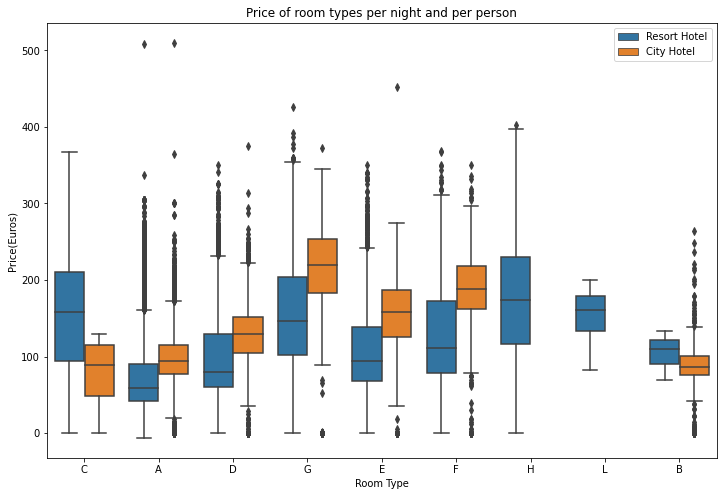

In [ ]:
#We are using the boxplot as of now
plt.figure(figsize=(12,8))
sns.boxplot(x='reserved_room_type',y='adr',hue='hotel',data=data2) #adr represents price
plt.title('Price of room types per night and per person')
plt.xlabel('Room Type')
plt.ylabel('Price(Euros)')
plt.legend()
plt.show()

In [ ]:
# sns.boxplot?  for more documentation
# hue -> on which basis we need to split our boxplot

# Problem Statement
# How does the prices per night vary over the year? remember the word "vary" for visualization point of view

In [ ]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
data_resort=data[(data['hotel']=='Resort Hotel') & (data['is_canceled']==0)]
data_City=data[(data['hotel']=='City Hotel') & (data['is_canceled']==0)]

In [ ]:
data_resort.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [ ]:
#Now if we can get some idea or statistics as per arrival_date_month with price
# then we can move further and check for year as well
# So for combining this arrival_data_month with data_resort we use groupby

data_resort.groupby(['arrival_date_month']).mean()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
arrival_date_month,,,,,,,,,,,,,,,,,,,,
April,0.0,73.631765,2016.472549,16.034510,16.312549,1.057647,2.723137,1.754118,0.074510,0.009412,0.067059,0.012549,0.278039,0.444706,180.644706,25.748627,0.347059,75.867816,0.185490,0.540784
August,0.0,92.794596,2016.019650,33.461775,15.795210,1.457476,3.714768,2.038686,0.237335,0.032238,0.023641,0.001535,0.061099,0.350015,182.369972,3.241019,0.000000,181.205892,0.191894,1.034695
December,0.0,44.758193,2015.523833,51.123635,16.345581,0.796425,2.284012,1.774578,0.087388,0.017378,0.070506,0.007448,0.220457,0.289474,157.182721,16.510427,3.202582,68.410104,0.183217,0.668322
February,0.0,27.603120,2016.517764,7.276863,14.971837,0.852686,2.178076,1.761698,0.091854,0.012132,0.098787,0.011265,0.306326,0.254766,145.472704,31.759532,0.264731,54.147478,0.163778,0.598787
January,0.0,19.666131,2016.590032,3.086281,16.659700,0.707395,1.985531,1.640943,0.056806,0.008574,0.114148,0.011790,0.327974,0.282422,141.914791,20.309753,0.054126,48.761125,0.189711,0.582529
July,0.0,96.211986,2016.011476,29.049410,16.138030,1.473063,3.726809,2.011795,0.215174,0.020720,0.024546,0.001594,0.095314,0.320370,184.798852,5.269684,0.003507,150.122528,0.210073,0.852088
June,0.0,125.800687,2016.512518,24.531664,15.020619,1.478645,3.854688,1.898380,0.110457,0.015709,0.058910,0.006873,0.205695,0.330879,180.139421,12.692685,0.736377,107.974850,0.226313,0.718213
March,0.0,52.441074,2016.451964,11.620770,16.199533,0.912874,2.792299,1.720731,0.063011,0.009724,0.092571,0.009335,0.340723,0.341112,147.742124,41.636717,0.565928,57.056838,0.165694,0.485414
May,0.0,107.077318,2016.478107,20.341223,15.911637,1.175937,3.056016,1.828008,0.071400,0.018935,0.062327,0.005523,0.199606,0.360552,175.121499,25.456016,0.134911,76.657558,0.191716,0.587771


In [ ]:
#Now we are specifically checking for the prices ('adr')
resort_hotel=data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel

,arrival_date_month,adr
0,April,75.867816
1,August,181.205892
2,December,68.410104
3,February,54.147478
4,January,48.761125
5,July,150.122528
6,June,107.974850
7,March,57.056838
8,May,76.657558
9,November,48.706289


In [ ]:
City_hotel=data_City.groupby(['arrival_date_month'])['adr'].mean().reset_index()
City_hotel

,arrival_date_month,adr
0,April,111.962267
1,August,118.674598
2,December,88.401855
3,February,86.520062
4,January,82.330983
5,July,115.818019
6,June,117.874360
7,March,90.658533
8,May,120.669827
9,November,86.946592


In [ ]:
#In order to get complete details of our hotel we merge both hotels
#Keep in mind that while merging atleast one column should be common in both dataframes
final=resort_hotel.merge(City_hotel,on="arrival_date_month")
final.columns=['month','price_of_resort','price_of_city']
final

,month,price_of_resort,price_of_city
0,April,75.867816,111.962267
1,August,181.205892,118.674598
2,December,68.410104,88.401855
3,February,54.147478,86.520062
4,January,48.761125,82.330983
5,July,150.122528,115.818019
6,June,107.974850,117.874360
7,March,57.056838,90.658533
8,May,76.657558,120.669827
9,November,48.706289,86.946592


In [ ]:
#So in order to sort the month according to the month-wise own code 
# can be complex so lets install some packages and try to sort 

!pip install sort-dataframeby-monthorweek  



  Created wheel for sort-dataframeby-monthorweek: filename=sort_dataframeby_monthorweek-0.4-py3-none-any.whl size=3442 sha256=6e93c9bac662fa4b74307a0050376f4c363e7397f50c2b7a815a4a4fa1e92d34
  Stored in directory: /root/.cache/pip/wheels/de/e1/ad/5fe265a9780676079c4b8caaaffaa8d5c4ab2f37cf823e8aa8
Successfully built sort-dataframeby-monthorweek


In [ ]:
# We need to install above one first one because it is the dependency one
# For below package
!pip install sorted-months-weekdays

  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3247 sha256=667bbc664b3feafbbed50a30c1d35607023f89b9c6e463073e6130d407a26d2c
  Stored in directory: /root/.cache/pip/wheels/4f/4f/78/3f1b8fc72651f7c766a6f73d667fccb12a8aabe240b38df7a4
Successfully built sorted-months-weekdays


In [ ]:
import sort_dataframeby_monthorweek as sd

In [ ]:
def sort_data(df,colname):
  return sd.Sort_Dataframeby_Month(df,colname)


In [ ]:
final=sort_data(final,'month')
final

,month,price_of_resort,price_of_city
0,January,48.761125,82.330983
1,February,54.147478,86.520062
2,March,57.056838,90.658533
3,April,75.867816,111.962267
4,May,76.657558,120.669827
5,June,107.974850,117.874360
6,July,150.122528,115.818019
7,August,181.205892,118.674598
8,September,96.416860,112.776582
9,October,61.775449,102.004672


#Now for visual representation 
#Whenever someone ask you 

1) What exactly the trend are??

2) How something is varying 

## Best Approach is going for a Line Plot

In [ ]:

px.line(final,
        x='month',y=["price_of_resort","price_of_city"],
        title="Room price per night over the months")

# So we will be getting a amazing trends showing line plot over the months

## From above graph we can say that prices of resort hotel are much higher during the summer and starting of rainy. 
## Whereas the prices of city hotel will rise very less and it is very expensive during the spring and autumn.

## Problem Statement
## 1) Which are the most busy months or in which months Guests are high??
## 2) How long do people stay at hotels??

In [ ]:
# According to the 1st Question we need the count of each month so
rush_resort=data_resort['arrival_date_month'].value_counts().reset_index()
rush_resort.columns=['month','No of Guests']
rush_resort

,month,No of Guests
0,August,3257
1,July,3137
2,October,2575
3,March,2571
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2037
9,December,2014


In [ ]:
rush_City=data_City['arrival_date_month'].value_counts().reset_index()
rush_City.columns=['month','No of Guests']
rush_City

,month,No of Guests
0,August,5367
1,July,4770
2,May,4568
3,June,4358
4,October,4326
5,September,4283
6,March,4049
7,April,4010
8,February,3051
9,November,2676


In [ ]:
final_rush=rush_resort.merge(rush_City,on="month")
final_rush

,month,No of Guests_x,No of Guests_y
0,August,3257,5367
1,July,3137,4770
2,October,2575,4326
3,March,2571,4049
4,April,2550,4010
5,May,2535,4568
6,February,2308,3051
7,September,2102,4283
8,June,2037,4358
9,December,2014,2377


In [ ]:
final_rush.columns=['month','no of Guests in resort hotel','no of Guests in City hotel']
final_rush

,month,no of Guests in resort hotel,no of Guests in City hotel
0,August,3257,5367
1,July,3137,4770
2,October,2575,4326
3,March,2571,4049
4,April,2550,4010
5,May,2535,4568
6,February,2308,3051
7,September,2102,4283
8,June,2037,4358
9,December,2014,2377


In [ ]:
final_rush=sort_data(final_rush,'month')
final_rush

,month,no of Guests in resort hotel,no of Guests in City hotel
0,January,1866,2249
1,February,2308,3051
2,March,2571,4049
3,April,2550,4010
4,May,2535,4568
5,June,2037,4358
6,July,3137,4770
7,August,3257,5367
8,September,2102,4283
9,October,2575,4326


In [ ]:
final_rush.columns

Index(['month', 'no of Guests in resort hotel', 'no of Guests in City hotel'], dtype='object')

In [ ]:
#To Visualize the trend we are going to use the line plot
px.line(final_rush,x='month',y=['no of Guests in resort hotel', 'no of Guests in City hotel'],title="Total no of guests per month")

## The above Graph shows that in the months of june,july,august there is more no of guests in both city and resort whereas in the months of november and december (that is in winter) guests are low in both the hotels which also solves the 2nd question of how long people staying in a hotel.

## Problem Statement
## Select important features using co-relation for Machine Learning

In [ ]:
data.corr() #So initially lets apply .corr() function and see the correlation for entire dataset

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.292876,0.016622,0.008315,-0.005948,-0.001323,0.025542,0.058182,0.004851,-0.032569,-0.083745,0.110139,-0.057365,-0.144832,-0.046770,-0.083594,0.054301,0.046492,-0.195701,-0.234877
lead_time,0.292876,1.000000,0.040334,0.127046,0.002306,0.085985,0.166892,0.117575,-0.037878,-0.021003,-0.123209,0.086025,-0.073599,0.002230,-0.013114,-0.085854,0.170008,-0.065018,-0.116624,-0.095949
arrival_date_year,0.016622,0.040334,1.000000,-0.540373,-0.000121,0.021694,0.031203,0.030266,0.054710,-0.013192,0.010281,-0.119905,0.029234,0.031416,0.056438,0.033682,-0.056348,0.198429,-0.013812,0.108610
arrival_date_week_number,0.008315,0.127046,-0.540373,1.000000,0.066572,0.018629,0.016047,0.026567,0.005556,0.010417,-0.031125,0.035493,-0.021009,0.006311,-0.018225,-0.032912,0.022677,0.076281,0.001980,0.026202
arrival_date_day_of_month,-0.005948,0.002306,-0.000121,0.066572,1.000000,-0.016225,-0.028362,-0.001754,0.014550,-0.000235,-0.006471,-0.027027,-0.000306,0.011266,0.000159,0.003667,0.022532,0.030291,0.008569,0.003026
stays_in_weekend_nights,-0.001323,0.085985,0.021694,0.018629,-0.016225,1.000000,0.494175,0.094759,0.046135,0.018607,-0.086009,-0.012769,-0.042859,0.050191,0.162411,-0.080783,-0.054399,0.050670,-0.018520,0.073124
stays_in_week_nights,0.025542,0.166892,0.031203,0.016047,-0.028362,0.494175,1.000000,0.096214,0.044652,0.020373,-0.095302,-0.013976,-0.048873,0.080018,0.196777,-0.044437,-0.002026,0.066847,-0.024933,0.068738
adults,0.058182,0.117575,0.030266,0.026567,-0.001754,0.094759,0.096214,1.000000,0.029409,0.017890,-0.140973,-0.007070,-0.108856,-0.041472,0.023370,-0.166182,-0.008365,0.224253,0.014438,0.123353
children,0.004851,-0.037878,0.054710,0.005556,0.014550,0.046135,0.044652,0.029409,1.000000,0.023999,-0.032475,-0.024755,-0.021078,0.051000,0.050461,-0.042554,-0.033293,0.325057,0.056247,0.081747
babies,-0.032569,-0.021003,-0.013192,0.010417,-0.000235,0.018607,0.020373,0.017890,0.023999,1.000000,-0.008813,-0.007509,-0.006552,0.085605,0.030235,-0.009426,-0.010627,0.029043,0.037389,0.097939


In [ ]:
#Now our target is to select important features so for that we know our main goal is "is_canceled" or not so lets check for that column

In [ ]:
co_relation=data.corr()['is_canceled']
co_relation

is_canceled                       1.000000
lead_time                         0.292876
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month        -0.005948
stays_in_weekend_nights          -0.001323
stays_in_week_nights              0.025542
adults                            0.058182
children                          0.004851
babies                           -0.032569
is_repeated_guest                -0.083745
previous_cancellations            0.110139
previous_bookings_not_canceled   -0.057365
booking_changes                  -0.144832
agent                            -0.046770
company                          -0.083594
days_in_waiting_list              0.054301
adr                               0.046492
required_car_parking_spaces      -0.195701
total_of_special_requests        -0.234877
Name: is_canceled, dtype: float64

In [ ]:
#We are basically removing the negative signs using abs followed by sorting them in descending order
co_relation.abs().sort_values(ascending=False) 

is_canceled                       1.000000
lead_time                         0.292876
total_of_special_requests         0.234877
required_car_parking_spaces       0.195701
booking_changes                   0.144832
previous_cancellations            0.110139
is_repeated_guest                 0.083745
company                           0.083594
adults                            0.058182
previous_bookings_not_canceled    0.057365
days_in_waiting_list              0.054301
agent                             0.046770
adr                               0.046492
babies                            0.032569
stays_in_week_nights              0.025542
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month         0.005948
children                          0.004851
stays_in_weekend_nights           0.001323
Name: is_canceled, dtype: float64

In [ ]:
data.groupby('is_canceled')['reservation_status'].value_counts() #We are checking the reservation_status of is_canceled column

is_canceled  reservation_status
0            Check-Out             75011
1            Canceled              42993
             No-Show                1206
Name: reservation_status, dtype: int64

In [ ]:
#Lets exclude some of the features that are not affecting more or contributing less for the is_canceled column
list_not=['days_in_waiting_list','arrival_date_year']

In [ ]:
cols=[]
for col in data.columns:
  if data[col].dtype!='O' and col not in list_not:  # 'O' represents object type
    cols.append(col)
cols

['is_canceled',
 'lead_time',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [ ]:
# Using list comprehension for reducing no of lines

num_features=[col for col in data.columns if data[col].dtype!='O' and col not in list_not]
num_features

['is_canceled',
 'lead_time',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

## I need to exclude similarly for categorical data too 

In [ ]:
data.columns


Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
cat_not=['arrival_date_year','assigned_room_type','booking_changes','reservation_status','country','days_in_waiting_list']

In [ ]:
cat_features=[col for col in data.columns if data[col].dtype=='O' and col not in cat_not]
cat_features

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status_date']

## Problem Statement
## Extract Some Derived Features from data

In [ ]:
data_cat=data[cat_features]
data_cat.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,7/1/2015
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,7/1/2015
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,7/2/2015
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,7/2/2015
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,7/3/2015


## Here Derived Features means Like in DBMS Derived attribute we learned that from date of birth we can derive our age so similarly here from reservation_status_date we can derive the day,month and year as well

In [ ]:
 #data_cat.dtypes

In [ ]:
# But as you know our reservation_status_date is of object dtype but we want in some number format for dd/mm/yyyy so

data_cat['reservation_status_date']=pd.to_datetime(data_cat['reservation_status_date'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#Its working but we are getting some warnings so we can ignore those warnings by
import warnings
from warnings import filterwarnings
filterwarnings('ignore')  # and again run the above code to remove those warnings

In [ ]:
data_cat['reservation_status_date']=pd.to_datetime(data_cat['reservation_status_date'])

In [ ]:
data_cat['reservation_status_date'].dt.year

# dt can be used to access the values of the series as datetimelike and return several properties. 
#Pandas Series. dt.year attribute return a numpy array containing year of the datetime in the underlying data of the given series object

0         2015
1         2015
2         2015
3         2015
4         2015
          ... 
119385    2017
119386    2017
119387    2017
119388    2017
119389    2017
Name: reservation_status_date, Length: 119210, dtype: int64

In [ ]:
data_cat['year']=data_cat['reservation_status_date'].dt.year
data_cat['month']=data_cat['reservation_status_date'].dt.month
data_cat['day']=data_cat['reservation_status_date'].dt.day

In [ ]:
data_cat.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date,year,month,day
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01,2015,7,1
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01,2015,7,1
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,2015-07-02,2015,7,2
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,2015-07-02,2015,7,2
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015-07-03,2015,7,3


In [ ]:
#Now once you got the details of year,mon,and day there is no need of reservation_status_date so lets drop it
data_cat.drop('reservation_status_date',axis=1,inplace=True)

In [ ]:
#Now is_canceled is opposite to this it is in int64 type intially but it should be in obj type as 0 and 1 are representing
# Not canceled and canceled in object type so lets create a new column

data_cat['cancellation']=data['is_canceled']
data_cat.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,cancellation
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1,0
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1,0
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,2015,7,2,0
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,2015,7,2,0
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015,7,3,0


##  Applying Feature Encoding on above data 
## As ML models will not work well on object data

In [ ]:
data_cat['market_segment'].unique()  #As you can see there are more no of unique features are there

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

## Now we need to Perform Mean Encoding 

In [ ]:
#Now firstly lets consider only the independent categorical columns leaving the last column as it is our target or basis

cols=data_cat.columns[0:8]
cols

Index(['hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'deposit_type',
       'customer_type'],
      dtype='object')

In [ ]:
#Lets take an example of one column and what exactly happening to it and then we will replicate the same for other columns
data_cat.groupby(['hotel'])['cancellation'].mean()  # SO replace this mean with where ever we get resort or city hotels

hotel
City Hotel      0.417859
Resort Hotel    0.277674
Name: cancellation, dtype: float64

In [ ]:
for col in cols:
  print(data_cat.groupby([col])['cancellation'].mean())
  print('\n')
  

hotel
City Hotel      0.417859
Resort Hotel    0.277674
Name: cancellation, dtype: float64


arrival_date_month
April        0.407835
August       0.377823
December     0.350348
February     0.334451
January      0.305016
July         0.374644
June         0.414860
March        0.322277
May          0.397029
November     0.313100
October      0.380910
September    0.391905
Name: cancellation, dtype: float64


meal
BB           0.374106
FB           0.598997
HB           0.344653
SC           0.374064
Undefined    0.244654
Name: cancellation, dtype: float64


market_segment
Aviation         0.221277
Complementary    0.122253
Corporate        0.187618
Direct           0.153712
Groups           0.611086
Offline TA/TO    0.343313
Online TA        0.367590
Undefined        1.000000
Name: cancellation, dtype: float64


distribution_channel
Corporate    0.220568
Direct       0.174868
GDS          0.191710
TA/TO        0.410598
Undefined    0.800000
Name: cancellation, dtype: float64


reserve

In [ ]:
#Now we need to convert the above code into dictionary because we have key-value pairs and we can easily map them to our data
for col in cols:
  d=data_cat.groupby([col])['cancellation'].mean().to_dict()
  print(d)
  print('\n')
  

{'City Hotel': 0.4178593534858457, 'Resort Hotel': 0.27767373336329815}


{'April': 0.40783534934103627, 'August': 0.37782266791717767, 'December': 0.35034768456872317, 'February': 0.3344510680576254, 'January': 0.305016044587063, 'July': 0.37464409996836445, 'June': 0.41485954799158203, 'March': 0.32227682227682225, 'May': 0.3970288624787776, 'November': 0.31309998523113275, 'October': 0.38090966179241054, 'September': 0.3919047619047619}


{'BB': 0.3741055553146277, 'FB': 0.5989974937343359, 'HB': 0.3446534790427445, 'SC': 0.3740638923120675, 'Undefined': 0.2446535500427716}


{'Aviation': 0.22127659574468084, 'Complementary': 0.12225274725274725, 'Corporate': 0.18761832639151838, 'Direct': 0.15371165156572883, 'Groups': 0.6110858471022181, 'Offline TA/TO': 0.3433132081713671, 'Online TA': 0.3675897035881435, 'Undefined': 1.0}


{'Corporate': 0.22056833558863329, 'Direct': 0.1748682499486688, 'GDS': 0.19170984455958548, 'TA/TO': 0.41059846547314577, 'Undefined': 0.8}


{'A': 0.391566

In [ ]:
for col in cols:
  d=data_cat.groupby([col])['cancellation'].mean().to_dict()
  data_cat[col]=data_cat[col].map(d)
  
  

In [ ]:
data_cat.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,cancellation
0,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,1,0
1,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,1,0
2,0.277674,0.374644,0.374106,0.153712,0.174868,0.391567,0.28402,0.407864,2015,7,2,0
3,0.277674,0.374644,0.374106,0.187618,0.220568,0.391567,0.28402,0.407864,2015,7,2,0
4,0.277674,0.374644,0.374106,0.367590,0.410598,0.391567,0.28402,0.407864,2015,7,3,0


In [ ]:
#So our data got converted into numerical 
# so next our step is to concat our numerical features we found earlier with this new data_cat 
# here i took data[num_features] instead of num_features because num_features is just a collection(list) of numeric columns whereas 
# data[num_features]-> gives u the dataset that are having only this numeric columns

dataframe=pd.concat([data_cat,data[num_features]],axis=1)   # and we need to contact them vertically so axis=1
dataframe                                          

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,cancellation,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,adr,required_car_parking_spaces,total_of_special_requests
0,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,1,0,0,342,27,1,0,0,2,0.0,0,0,0,0,3,0.0,0.0,0.00,0,0
1,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,1,0,0,737,27,1,0,0,2,0.0,0,0,0,0,4,0.0,0.0,0.00,0,0
2,0.277674,0.374644,0.374106,0.153712,0.174868,0.391567,0.28402,0.407864,2015,7,2,0,0,7,27,1,0,1,1,0.0,0,0,0,0,0,0.0,0.0,75.00,0,0
3,0.277674,0.374644,0.374106,0.187618,0.220568,0.391567,0.28402,0.407864,2015,7,2,0,0,13,27,1,0,1,1,0.0,0,0,0,0,0,304.0,0.0,75.00,0,0
4,0.277674,0.374644,0.374106,0.367590,0.410598,0.391567,0.28402,0.407864,2015,7,3,0,0,14,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0.0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0.417859,0.377823,0.374106,0.343313,0.410598,0.391567,0.28402,0.407864,2017,9,6,0,0,23,35,30,2,5,2,0.0,0,0,0,0,0,394.0,0.0,96.14,0,0
119386,0.417859,0.377823,0.374106,0.367590,0.410598,0.292683,0.28402,0.407864,2017,9,7,0,0,102,35,31,2,5,3,0.0,0,0,0,0,0,9.0,0.0,225.43,0,2
119387,0.417859,0.377823,0.374106,0.367590,0.410598,0.318108,0.28402,0.407864,2017,9,7,0,0,34,35,31,2,5,2,0.0,0,0,0,0,0,9.0,0.0,157.71,0,4
119388,0.417859,0.377823,0.374106,0.367590,0.410598,0.391567,0.28402,0.407864,2017,9,7,0,0,109,35,31,2,5,2,0.0,0,0,0,0,0,89.0,0.0,104.40,0,0


In [ ]:
#Now in above dataframe we are having 'cancellation' and 'is_canceled' from numeric and categorial dataframes
# So lets drop any one right now iam removing cancellation

dataframe.drop('cancellation',axis=1,inplace=True)

In [ ]:
dataframe.shape

(119210, 29)

In [ ]:
dataframe.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,adr,required_car_parking_spaces,total_of_special_requests
0,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,1,0,342,27,1,0,0,2,0.0,0,0,0,0,3,0.0,0.0,0.0,0,0
1,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,1,0,737,27,1,0,0,2,0.0,0,0,0,0,4,0.0,0.0,0.0,0,0
2,0.277674,0.374644,0.374106,0.153712,0.174868,0.391567,0.28402,0.407864,2015,7,2,0,7,27,1,0,1,1,0.0,0,0,0,0,0,0.0,0.0,75.0,0,0
3,0.277674,0.374644,0.374106,0.187618,0.220568,0.391567,0.28402,0.407864,2015,7,2,0,13,27,1,0,1,1,0.0,0,0,0,0,0,304.0,0.0,75.0,0,0
4,0.277674,0.374644,0.374106,0.367590,0.410598,0.391567,0.28402,0.407864,2015,7,3,0,14,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0.0,98.0,0,1


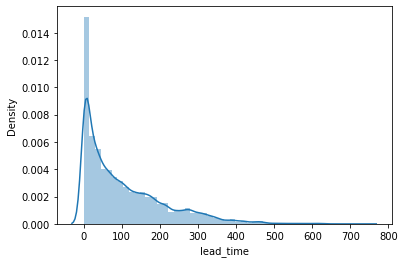

In [ ]:
sns.distplot(dataframe['lead_time'])  
# here the distribution shows that it is little bit right skewed and more no of values are in b/w 200 and 300
# whereas from 600,700,800 we are having our outliers

In [ ]:
# Nice approach to handle this outliers is to apply log on this lead_time 
# As Applying log  the skewness to a greater extent will get solved.

def handle_outliers(col):
  dataframe[col]=np.log1p(dataframe[col]) # This will exactly convert the column we provide into its log
  


In [ ]:
handle_outliers('lead_time')

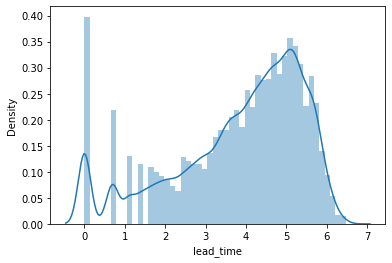

In [ ]:
#Now if i run again the distplot on lead_time column then!!
sns.distplot(dataframe['lead_time'])

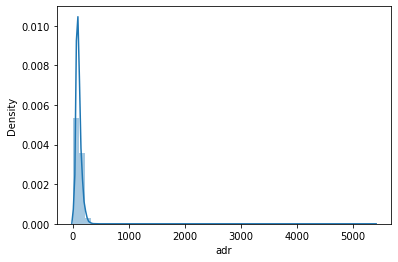

In [ ]:
# Similarly for adr  (initially)
sns.distplot(dataframe['adr'])

In [ ]:
handle_outliers('adr')

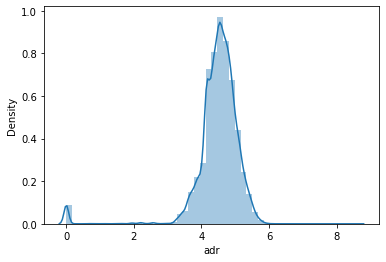

In [ ]:
sns.distplot(dataframe['adr'].dropna())

## Applying Techniques of Feature Importance 

In [ ]:
dataframe.isnull().sum()

hotel                             0
arrival_date_month                0
meal                              0
market_segment                    0
distribution_channel              0
reserved_room_type                0
deposit_type                      0
customer_type                     0
year                              0
month                             0
day                               0
is_canceled                       0
lead_time                         0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
agent                             0
company                           0
adr                               1
required_car_parking_spaces 

In [ ]:
dataframe.dropna(inplace=True)

In [ ]:
#Now we need independent and dependent variables inorder to apply feature importance
y=dataframe['is_canceled']
x=dataframe.drop('is_canceled',axis=1)

In [ ]:
#Now we need to import some libraries to do some feature importance tasks

from sklearn.linear_model import Lasso  # Lasso is the modified version of Linear Regression where it penalizes the model for the sum of absolute values of weights
from sklearn.feature_selection import SelectFromModel  # we are using this package to select the most important features 

In [ ]:
 #In Lasso the most imp parameter is alpha as it is(penalizing)parameter which means bigger the value of alpha(lesser the features will get selected)
 #SelectFromModel will select the features whose coefficients are non-zeros
feature_select_model=SelectFromModel(Lasso(alpha=0.005,random_state=0))  # as i need more features to be selected so i choosed lower value of alpha

In [ ]:
feature_select_model.fit(x,y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [ ]:
feature_select_model.get_params()

{'estimator': Lasso(alpha=0.005, random_state=0),
 'estimator__alpha': 0.005,
 'estimator__copy_X': True,
 'estimator__fit_intercept': True,
 'estimator__max_iter': 1000,
 'estimator__normalize': 'deprecated',
 'estimator__positive': False,
 'estimator__precompute': False,
 'estimator__random_state': 0,
 'estimator__selection': 'cyclic',
 'estimator__tol': 0.0001,
 'estimator__warm_start': False,
 'importance_getter': 'auto',
 'max_features': None,
 'norm_order': 1,
 'prefit': False,
 'threshold': None}

In [ ]:
# To get more details about what more features we need to consider we use this function
feature_select_model.get_support()  

array([False, False, False, False, False, False,  True, False,  True,
        True,  True,  True,  True, False, False, False,  True,  True,
       False, False,  True, False,  True, False,  True,  True,  True,
        True])

If False-> that feature isn't contributing much more to my ML model

If True-> that feature is contributing and we need to consider this       feature for our ML model

In [ ]:
#Now in order to get the count of only selected features that my model selects out of total features is
cols=x.columns
selected_features=cols[feature_select_model.get_support()]

In [ ]:
selected_features

Index(['deposit_type', 'year', 'month', 'day', 'lead_time',
       'arrival_date_week_number', 'adults', 'children',
       'previous_cancellations', 'booking_changes', 'company', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')

In [ ]:
x.shape

(119209, 28)

In [ ]:
print("Total Features are {}".format(x.shape[1]))
print("Selected Features by my model are {}".format(len(selected_features)))

Total Features are 28
Selected Features by my model are 14


In [ ]:
x=x[selected_features] #Now we are updating our x with only the selected features

In [ ]:
x.shape   

(119209, 14)

## Problem Statement
## 1) Apply the suitable algorithm on the ML model
## 2) Apply cross-validation on that Model

In [ ]:
#Now we are going to apply the Logistic regression on our ML model (As our problem hotel booking is a classification model )
#Before that first of all we need to split our data 
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [ ]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
y_pred=logreg.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test,y_pred)

array([[15785,  2899],
       [ 4465,  6654]])

In [ ]:
accuracy_score(y_test,y_pred)

0.7529107807938799

#As we are getting fluctuation in the accuracy when we are changing our random_state 
#And we need to consider our accuracy in terms of range so lets do cross validation to
#Have a Final Accuracy

In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(logreg,x,y,cv=10)

In [ ]:
score.mean() 
#It shows somewhere around 70% which means our 70% of predictions are going to be
#Correct whereas the other 30% of predictions are not 

0.7141493488452222